# Question 1

In [49]:
import pandas as pd

# simplifies working with dates
from datetime import datetime

import numpy as np
import random

In [136]:
df = pd.DataFrame({'date':pd.date_range(start='2012-01', end='2030-12', freq='M')})
df['date'] = df['date'].dt.strftime('%Y%m')
df.head(5)

,date
0,201201
1,201202
2,201203
3,201204
4,201205


In [24]:
date_dct = {'01': 'ינואר', 
            '02': 'פברואר',
            '03': 'מרץ',
            '04': 'אפריל',
            '05': 'מאי', 
            '06': 'יוני',
            '07': 'יולי',
            '08': 'אוגוסט',
            '09': 'ספטמבר',
            '10': 'אוקטובר',
            '11': 'נובמבר',
            '12': 'דצמבר'}

In [137]:
dfYears = df.date.apply(lambda x: str(x)[0:4])
dfMonths = df.date.apply(lambda x: str(x)[4:6])

In [138]:
df['dates_h'] = dfYears+'-'+dfMonths.map(date_dct)

In [139]:
df.head(5)

,date,dates_h
0,201201,2012-ינואר
1,201202,2012-פברואר
2,201203,2012-מרץ
3,201204,2012-אפריל
4,201205,2012-מאי


# Question 2

In [66]:
df['שכר'] = df.date.apply(lambda x: round(random.uniform(0,100),1))

In [67]:
df

,date,dates_h,שכר
0,201201,2012-ינואר,95.4
1,201202,2012-פברואר,32.3
2,201203,2012-מרץ,67.7
3,201204,2012-אפריל,55.8
4,201205,2012-מאי,91.1
...,...,...,...
222,203007,2030-יולי,31.5
223,203008,2030-אוגוסט,73.2
224,203009,2030-ספטמבר,81.4
225,203010,2030-אוקטובר,65.3


# Question 3

In [97]:
df['dates_hh'] = dfMonths.map(date_dct)
df

,date,dates_h,שכר,dates_hh
0,201201,2012-ינואר,95.4,ינואר
1,201202,2012-פברואר,32.3,פברואר
2,201203,2012-מרץ,67.7,מרץ
3,201204,2012-אפריל,55.8,אפריל
4,201205,2012-מאי,91.1,מאי
...,...,...,...,...
222,203007,2030-יולי,31.5,יולי
223,203008,2030-אוגוסט,73.2,אוגוסט
224,203009,2030-ספטמבר,81.4,ספטמבר
225,203010,2030-אוקטובר,65.3,אוקטובר


In [109]:
df3 = df.groupby('dates_hh')['שכר'].sum().reset_index()
df3

,dates_hh,שכר
0,אוגוסט,1013.2
1,אוקטובר,909.0
2,אפריל,1001.9
3,דצמבר,756.1
4,יולי,928.4
5,יוני,906.2
6,ינואר,1092.3
7,מאי,950.7
8,מרץ,1108.9
9,נובמבר,1068.6


In [122]:
df3.index=[0]*len(df3)
df_new = df3.pivot(columns='dates_hh',values='שכר')

In [127]:
df_new

dates_hh,אוגוסט,אוקטובר,אפריל,דצמבר,יולי,יוני,ינואר,מאי,מרץ,נובמבר,ספטמבר,פברואר
index,,,,,,,,,,,,
0,1013.2,909.0,1001.9,756.1,928.4,906.2,1092.3,950.7,1108.9,1068.6,794.6,1017.3


In [128]:
df.drop('dates_hh', axis=1)

,date,dates_h,שכר
0,201201,2012-ינואר,95.4
1,201202,2012-פברואר,32.3
2,201203,2012-מרץ,67.7
3,201204,2012-אפריל,55.8
4,201205,2012-מאי,91.1
...,...,...,...
222,203007,2030-יולי,31.5
223,203008,2030-אוגוסט,73.2
224,203009,2030-ספטמבר,81.4
225,203010,2030-אוקטובר,65.3


# Question 4

In [229]:
workers = pd.DataFrame()

In [230]:
workers['מספר עובד'] = np.arange(3000)

In [197]:
workers

,מספר עובד
0,0
1,1
2,2
3,3
4,4
...,...
2995,2995
2996,2996
2997,2997
2998,2998


In [148]:
risk = ['גבוה', 'בינוני', 'נמוך']

In [264]:
workers['רמת סיכון'] = np.random.choice(risk, size=len(workers), p=[0.5,0.2,0.3])
workers.groupby('רמת סיכון').size()

רמת סיכון
בינוני     625
גבוה      1465
נמוך       910
dtype: int64

In [322]:
worker = workers.copy()

In [210]:
workers.head(5)

,מספר עובד,רמת סיכון
0,0,גבוה
1,1,בינוני
2,2,גבוה
3,3,נמוך
4,4,גבוה


In [192]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()

In [323]:
def func(df1, df2, df3, df4, df5):
    grp = [1,2,4,6,8]
    for i, df in enumerate([df1, df2, df3, df4, df5]):
        df = worker.groupby('רמת סיכון').sample(frac=600/len(worker), replace=False, random_state=0)
        print(1, worker.shape)
        print(2, df.shape)
        worker.drop(df.index.values, axis=0, inplace=True)
        print(3, worker.shape)
        df['בודק שכר'] = grp[i]
        yield df

In [324]:
df1, df2, df3, df4, df5 = func(df1, df2, df3, df4, df5)

1 (3000, 2)
2 (600, 2)
3 (2400, 2)
1 (2400, 2)
2 (600, 2)
3 (1800, 2)
1 (1800, 2)
2 (600, 2)
3 (1200, 2)
1 (1200, 2)
2 (600, 2)
3 (600, 2)
1 (600, 2)
2 (600, 2)
3 (0, 2)


In [325]:
worker = pd.concat([df1, df2, df3, df4, df5],axis=0)

In [326]:
worker

,מספר עובד,רמת סיכון,בודק שכר
1766,1766,בינוני,1
1529,1529,בינוני,1
2035,2035,בינוני,1
1604,1604,בינוני,1
2062,2062,בינוני,1
...,...,...,...
2049,2049,נמוך,8
2710,2710,נמוך,8
691,691,נמוך,8
2594,2594,נמוך,8


In [327]:
worker['רמת סיכון'].value_counts()

גבוה      1465
נמוך       910
בינוני     625
Name: רמת סיכון, dtype: int64

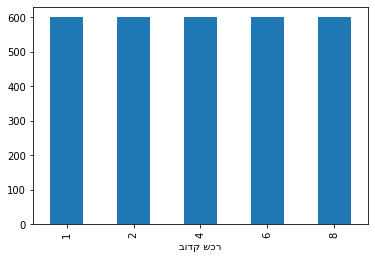

In [328]:
# Even distribution
worker.groupby('בודק שכר').size().plot.bar()

פתרון אלטרנטיבי:

In [179]:
x = workers.sort_values(by='רמת סיכון').reset_index()
x.drop('index', axis=1)

,מספר עובד,רמת סיכון
0,439,בינוני
1,1689,בינוני
2,1156,בינוני
3,2525,בינוני
4,1155,בינוני
...,...,...
2995,2309,נמוך
2996,609,נמוך
2997,2311,נמוך
2998,2313,נמוך


In [276]:
625/5

125.0

In [ ]:
x['בודק שכר'][0:124] = 1
x['בודק שכר'][124:249] = 2
x['בודק שכר'][249:374] = 4
x['בודק שכר'][374:499] = 6
x['בודק שכר'][499:624] = 8

In [287]:
1465/5

293.0

In [ ]:
x['בודק שכר'][624:917] = 1
x['בודק שכר'][917:1210] = 2
x['בודק שכר'][1210:1503] = 4
x['בודק שכר'][1503:1796] = 6
x['בודק שכר'][1796:2089] = 8

In [289]:
910/5

182.0

In [ ]:
x['בודק שכר'][2089:2271] = 1
x['בודק שכר'][2271:2453] = 2
x['בודק שכר'][2453:2635] = 4
x['בודק שכר'][2635:2817] = 6
x['בודק שכר'][2817:2999] = 8

In [299]:
df = x.sort_values(by='מספר עובד').reset_index()
df.drop('index', axis=1)

,level_0,מספר עובד,רמת סיכון,בודק שכר
0,661,0,גבוה,1
1,2354,1,נמוך,2
2,1738,2,גבוה,6
3,1737,3,גבוה,6
4,1736,4,גבוה,6
...,...,...,...,...
2995,2353,2995,נמוך,2
2996,1044,2996,גבוה,2
2997,409,2997,בינוני,6
2998,747,2998,גבוה,1


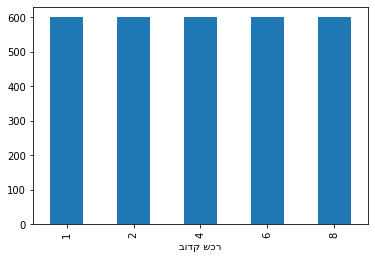

In [300]:
# Equal distribution between all checkers
df.groupby('בודק שכר').size().plot.bar()

# Logical thinking:

What is the average number of times it would take to roll a fair 6-sided dice and get all numbers on the dice k∈(1,…,6)? The order in which the numbers appear does not matter.

In [339]:
import random
import numpy as np


# initializing simulation list
per_100 = []


# keep going until we roll all six sides
for i in range(100):
    # initialize to empty set
    results = set()
    # remember how many rolls we have made
    rolls = 0
    while len(results) != 6:
        rolls += 1
        results.add(random.choice([1,2,3,4,5,6]))
        per_100.append(rolls)


print('It took %d rolls in avg to get all six sides' % np.mean(rolls))

It took 12 rolls in avg to get all six sides
